# **Assignment--Homogeneous Coordinates**

## **[Points: 30]**


Welcome to the first assignment of this moudule, __Image Formation and Representation__. Through this assignment you will be able to implement the pointconversion(i.e., cartesian coordinate system to homogeneous coordinate system) and geometric transformation like rotation, scaling and translation using Numpy. Furthermore, you will be able to recognize the advantages of the homogeneous system in performing composite transformation.


## **Outline**

* [Overview](#overview)
* [Point Conversion](#point_conversion)
    * [Exercise 1](#exercise-1) 
        * [Task 1](#exercise-1-task-1)
        * [Task 2](#exercise-1-task-2)
* [Rotation](#rotation)
    * [Exercise 2](#exercise-2)
        * [Task 1](#exercise-2-task-1)
        * [Task 2](#exercise-2-task-2)
* [Scaling](#scaling)
    * [Exercise 3](#exercise-3)
        * [Task 1](#exercise-3-task-1)
        * [Task 2](#exercise-3-task-2)
* [Translation](#translation)
    * [Exercise 4](#exercise-4)
        * [Task 1](#exercise-4-task-1)
        * [Task 2](#exercise-4-task-2)
* [Composite Transformation](#composite_transformation)
    * [Exercise 5](#exercise-5)

## **Overview** <a name='overview'></a>


Homogeneous coordinates are the coordinates system totally different from the normal coordinate system. In here, you can represent the 2D with 3D homogeneous coordinates, and 3D with 4D homogeneous coordinates. Here, it simply add another component to original coorinate system.

Suppose, your cartesian 2D point is $(x,y)$. This cartesian 2D point you can represent into 3D homogeneous form by introducing a third component to it Z. That is, now you can represent $(x,y)$ with $(xZ, yZ, Z)$.

This homogeneous coordinate system are good as it provides a lot advantages to you like handling of points at infinity, making formulas simpler, making complex transformation processes simpler and so on. It has a range of applications, including computer gaphics and 3D computer vision, where they allow affine transformatons, and projective transformations to be easily represented by a matrix.

Here, you will implement geometric transforamtions like `Rotation`, `Scaling` and `Translation` using homogeneous matrix and also composite transfomation using the above geometric trnasformations, as a part of this assignment. 




## **Point Conversion** <a name='point_conversion'></a>

The first excercise is the point conversion where you will perform simple conversion of cartesian coordinates to homogeneous ones and vice-versa. 




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry.polygon import Polygon
from descartes import PolygonPatch

### **Exercise  1**<a name="exercise-1"></a>

### **[Points: 5]**

In the homogeneous function, you just add another term, $w$, to the orginal co-ordinate system, $(x,y)$, as shown in the examples below.

$$
(x,y) ---> (x,y,1)\\
(x/w, y/w) ---> (x,y,w)
$$

Now, you need to create a function for the conversion of homogeneous coordinates to cartesian form and cartesian form to homogeneous ones.

#### **Task 1:** <a name="exercise-1-task-1"></a>

#### **[Points: 2]**

Create function `cartesian_to_homogenous()`. Here, you need to just add extra element to original coordinate system.

Hint: 

(5,5) is cartesian, homogeneous coordinates will be (5,5,1).

In [2]:
### Ex-1-Task-1
def cartesian_to_homogeneous(coordinates):
    
    '''
    This function converts the cartesian coordinates to homogeneous form.
    
    Parameters
    ----------
    coordinates: list, can be 2D, 3D coordinates
    
    return
    ------
    homogeneous_coords: nd-array of homogeneous coordinates
    '''
    # homogeneous coordinates (convert cartesian coordinate)
    homogeneous_coords = None
    
    # Exercise 1 / Task 1
    ### BEGIN SOLUTION
   
    ones = np.ones((coordinates.shape[0], 1), dtype=int)

   
    homogeneous_coords = np.hstack((coordinates, ones))
    ### END SOLUTION
    
    return homogeneous_coords 



In [4]:
### INTENTIONALLY LEFT BLANK ###

#### **Task 2:** <a name="exercise-1-task-2"></a>

#### **[Points: 3]**

Create function `homogeneous_to_cartesian()`. Here, you need to just remove the extra element from the given homogeneous coordinate system.

Hint: 

(10, 10, 2) is homogenous coordinates, cartesian coordinates will be (5,5).


In [5]:
### Ex-1-Task-2
def homogeneous_to_cartesian(coordinates):
    '''
    This function converts the homogeneous coordinates to cartesian form.
    
    Parameters
    ----------
    coordinates: list, can be 3D, 4D homogeneous coordinates
    
    return
    ------
    cartesian_coords: nd-array of cartesian coordinates
    '''
    
    # cartesian coordinates obtained by converting removing the third element from homogenous coordinates
    cartesian_coords = None
    
    # Exercise 1 / Task 2
    ### BEGIN SOLUTION
    
        
    coords = np.array(coordinates)

    
    last_column = coords[:, -1].reshape(-1, 1)

    
    cartesian_coords = coords[:, :-1] / last_column
    ### END SOLUTION
    
    return cartesian_coords
    

In [6]:
### INTENTIONALLY LEFT BLANK ###

## **Rotation** <a name="rotation"></a>

Rotation means turning an object around a certain fixed point, called the center of rotation(COR). In rotation, you rotate or turn an object with certain angle, called the angle of rotation(AOR), $\theta$. 

In rotation, if angle of rotation is positive, it is called anticlockwise rotation, and if the angle of rotation is negative, it is called clockwise rotation. 


### **Exercise  2**<a name="exercise-2"></a>

### **[Points: 10]**

Here, you create function to rotate the different 2D shapes(like trianlge, square).

#### **Task 1:** <a name="exercise-2-task-1"></a>

#### **[Points: 5]**

In this task, you create a function to calculate the rotation matrix. 

___Hint:___

   * Use [np.deg2rad()](https://numpy.org/doc/stable/reference/generated/numpy.deg2rad.html) or [np.radians()](https://numpy.org/doc/stable/reference/generated/numpy.radians.html) to convert angle from degree to radians.
   
   * Convert the following 2D rotation matrices into homogeneous form:

   Anticlockwise Rotation matrix:
$$ 
\begin{bmatrix}
cos\theta & -sin\theta
 \\
sin\theta & cos\theta
\end{bmatrix}
{-------->}^{Homogeneous form}
\begin{bmatrix}
cos\theta & -sin\theta & 0
 \\
sin\theta & cos\theta & 0
\\ 0 & 0 & 1
\end{bmatrix}
$$
Clockwise Rotation  matrix:
$$ 
\begin{bmatrix}
cos\theta & sin\theta
 \\
-sin\theta & cos\theta
\end{bmatrix}
{-------->}^{Homogeneous form}
\begin{bmatrix}
cos\theta & -sin\theta & 0
 \\
sin\theta & cos\theta & 0
\\ 0 & 0 & 1
\end{bmatrix}
$$

`NOTE: np.cos(np.radians(90)) !=0 or np.cos(np.deg2rad(90)) !=0(Use some logic for this case)`


In [7]:
### Ex-2-Task-1
def get_rotation_matrix(angle):
    
    '''
    This function provides you the rotation matrix either for clockwise or anticlockwise rotation.
    
    Parameters
    ----------
        angle: angle of rotation in degree
    
    return
    ------
        rotation_matrix : numpy array
    '''
    
    # homogeneous rotation matrix 
    rotation_matrix = None
    
    # Exercise 2 / Task 1
    ### BEGIN SOLUTION
    # your code here
    
    theta = np.radians(angle)
    
    
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    
    
    if cos_theta != 0:
        rotation_matrix = np.array([[cos_theta, -sin_theta, 0],
                                    [sin_theta, cos_theta, 0],
                                    [0, 0, 1]])
    else:
        rotation_matrix = np.array([[1, 0, 0],
                                    [0, 1, 0],
                                    [0, 0, 1]])
    ### END SOLUTION
    
    return rotation_matrix


    

In [8]:
### INTENTIONALLY LEFT BLANK ###

#### **Task 2:** <a name="exercise-2-task-2"></a>

#### **[Points: 5]**

In this task, you create a function to perform the action of rotation. 

***Step 1:***  Convert the given coordinates points to homogeneous coordinate system

   * Use `np.array()`, `np.asarray()` for converting list into numpy array
   * Substract given coordinates point from centre of rotation
   * Use `cartesian_to_homogeneous()`, to convert given points ot homogeneous form 
   * Use list comprehension to simplify your steps or can perform multiple logical operations
       
***Step 2:*** Calculate the rotation matric
    
   * Use `get_rotation_matrix()`, for calculation of the rotation matrix
   * Use the center of rotation as origin

***Step 3:*** Calculate the rotated points

   * Use `np.matmul()`, to multiply homogeneous_points and rotating_matrix for calculating the rotated points
   
***Step 4:*** Convert homogeneous rotated points to cartesian form

   * Use `homogeneous_to_cartesian()`


In [9]:
### Ex-2-Task-2

def rotation(points, angle, COR = [0,0], homogeneous=False):
        '''
            This function performs rotation and returns the rotated points.
        
            Parameters
            -----------
                points: list of x and y cooridnates that needs to be rotated
                angle: rotating angle
                COR: list of x and y coordinates representing the center of rotation 
        
            return
            ------
                rotated_points: numpy array of rotated points(homogeneous form)
                cart_rotated_points: numpy array of rotated points(cartesian form)
        '''
        # STEP 1: convert the given points to homogenous form(in numpy array)
        homogenous_points = None
        
        # STEP 2: get rotation matrix
        rotation_matrix = None
        
        # STEP 3: get rotated points by multiplying homogeneous points with rotation matrix
        rotated_points = None
        
        # STEP 4: converting the homogeneous coordinates back to cartesian
        cart_rotated_points = None
        
        # Exercise 2 / Task 2
        ### BEGIN SOLUTION
        # your code here
        point = np.asarray(points)
        shifted_points = np.subtract(point,COR)
        homogenous_points = cartesian_to_homogeneous(shifted_points)
        rotation_matrix = get_rotation_matrix(angle)
        rotated_points= np.matmul(rotation_matrix,homogenous_points.T).T
        cart_rotated_points = homogeneous_to_cartesian(rotated_points)
        
        ### END SOLUTION
        
        return rotated_points, cart_rotated_points

In [10]:
### INTENTIONALLY LEFT BLANK ###

Now, let use above codes to rotate a rectangle `ABCD` with coordinates A(3, 5), B(3,10), C(8,10), D(8, 5).

In [11]:
rectangle = [[3,5], [3,10], [8,10], [8,5]] # rectangle coordinates
rectangle


[[3, 5], [3, 10], [8, 10], [8, 5]]

In [12]:
angle = 45 # angle of rotation

In [13]:
COR = [0,0] # centre of rotation


/opt/anaconda3/envs/cv/lib/python3.9/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


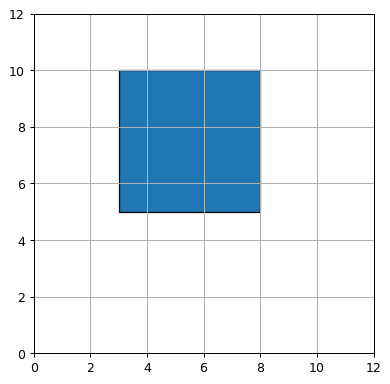

In [14]:
# plotting the rectangle coordinates

fig = plt.figure(1, figsize=(5,5), dpi=90) 
rectangle_shape = Polygon(rectangle)
ax = fig.add_subplot(111)
rectangle_shape = PolygonPatch(rectangle_shape)
ax.add_patch(rectangle_shape)
ax.set_xlim([0, 12])
ax.set_ylim([0,12])
ax.set_aspect(1)
plt.grid()
plt.show()

In [15]:
# rotation at an angle 45 degree in anticlockwise direction about origin
homo_rotated_points, rotated_points = rotation(rectangle, angle, COR)
print(homo_rotated_points)
rotated_points

[[-1.41421356  5.65685425  1.        ]
 [-4.94974747  9.19238816  1.        ]
 [-1.41421356 12.72792206  1.        ]
 [ 2.12132034  9.19238816  1.        ]]


array([[-1.41421356,  5.65685425],
       [-4.94974747,  9.19238816],
       [-1.41421356, 12.72792206],
       [ 2.12132034,  9.19238816]])

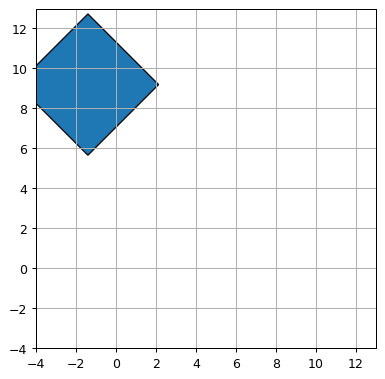

In [16]:
# plotting the rotated rectangle coordinates

fig = plt.figure(1, figsize=(5,5), dpi=90) 
ro_rectangle_shape = Polygon(rotated_points)
ax = fig.add_subplot(111)
ro_rectangle_shape = PolygonPatch(ro_rectangle_shape)
ax.add_patch(ro_rectangle_shape)
ax.set_xlim([-4, 13])
ax.set_ylim([-4,13])
ax.set_aspect(1)
plt.grid()
plt.show()

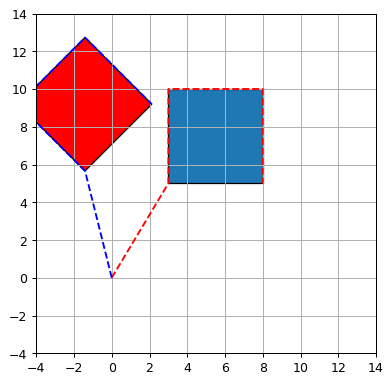

In [17]:
# plotting the original and translated triangle together
fig = plt.figure(1, figsize=(5,5), dpi=90)
ro_rectangle_shape = Polygon(rotated_points)
ax = fig.add_subplot(111)
ro_rectangle_shape = PolygonPatch(ro_rectangle_shape, facecolor='red')
ax.add_patch(ro_rectangle_shape)
rectangle_shape = Polygon(rectangle)
rectangle_shape = PolygonPatch(rectangle_shape)
ax.add_patch(rectangle_shape)
ax.set_xlim([-4, 14])
ax.set_ylim([-4,14])
ax.set_aspect(1)
plt.plot(
    [COR[0] if k==0 else rectangle[k-1][0]  for k in range(len(rectangle)+1)],
    [COR[1] if k==0 else rectangle[k-1][1]  for k in range(len(rectangle)+1)],
    'r--',
    [COR[0] if k==0 else rotated_points[k-1][0]  for k in range(len(rotated_points)+1)],
    [COR[1] if k==0 else rotated_points[k-1][1]  for k in range(len(rotated_points)+1)],
    'b--'
    )
plt.grid()
plt.show()

## **Scaling**<a name="scaling"></a>

Scaling means to resize an object. That means you either increase or decrease the size of the object. The process of increasing size is called enlargement/dilation, and decreasing size is called reduction/contraction.

Enlargement and dilation of an object depends on the scaling factor used for scaling transformation. If the sclaing factor > 1, it is called enlargement, and if it is less than 1, it is called contraction.  

### **Exercise  3**<a name="exercise-3"></a>

### **[Points: 5]**

Here, you create functions to accomplish the scaling transformation.

#### **Task 1:** <a name="exercise-3-task-1"></a>

###**[Points: 2]**

In this task, you create a function to calculate the scaling matrix. 

___Hint:___

   
   * Convert the following 2D scaling matrix into homogeneous form:

$$ 
\begin{bmatrix}
S_x & 0 \\ 0 & S_y 
\end{bmatrix}
{-------->}^{Homogeneous form}
\begin{bmatrix}
S_x & 0 & 0
 \\
 0 & S_y  & 0
\\  0 & 0 & 1
\end{bmatrix}
$$




In [18]:
### Ex-3-Task-1
def get_scaling_matrix(scaling_factor):
    
    '''
    This function provides you the scaling matrix for scaling geometric transformation.
    
    Parameters
    ----------
        scaling_factor: list, x  and y scaling factors
    
    return
    ------
        scaling_matrix : numpy array
    '''
    
    # homogeneous scaling matrix 
    scaling_matrix = None
    
    # Exercise 3 / Task 1
    ### BEGIN SOLUTION
    # your code here
    scaling_matrix = np.array([[scaling_factor[0], 0, 0],
                               [0, scaling_factor[1], 0],
                               [0, 0, 1]])
    ### END SOLUTION
    
    return scaling_matrix

In [19]:
### INTENTIONALLY LEFT BLANK ###

#### **Task 2:** <a name="exercise-3-task-2"></a>

#### **[Points: 3]**

In this task, you create a function to perform the scaling geometric transformation and returns the array of scaled homogeneous coordiantes. 

***Step 1:***  Convert the given coordinates points to homogeneous coordinate system

   * Similar to [Step 1](#exercise-2-task-2) of rotation exercise 2 task 2  
   
***Step 2:*** Calculate the scaling matrix
    
   * Use `get_scaling_matrix()`, for calculation of the scaling matrix

***Step 3:*** Calculate the scaled points

   * Use `np.matmul()`, to multiply homogeneous_points and scaling_matrix for calculating the scaled points

***Step 4:*** Convert homogeneous rotated points to cartesian form

   * Use `homogeneous_to_cartesian()`

In [20]:
### Ex-3-Task-2
def scaling(points, scaling_factor):
        '''
            This function performs scaling geometric transformation and returns the scaled points.
        
            Parameters
            -----------
                scaling_factor: list, x  and y scaling factors
        
            return
            ------
                scaled_points: numpy array of scaled points(homogeneous form)
                cart_scaled_points: numpy array of scaled points(cartesian form)
        
        '''
        # STEP 1: convert the given points to homogenous form(in numpy array)
        homogenous_points = None
        
        # STEP 2: get scaling matrix
        rscaling_matrix = None
        
        # STEP 3: get scaled points by multiplying homogeneous points with scaling matrix
        scaled_points = None
        
        # STEP 4: convert to cartesian form
        cart_scaled_points = None
        
        # Exercise 3 / Task 2
        ### BEGIN SOLUTION
        # your code here
        homogenous_points = cartesian_to_homogeneous(np.asarray(points))
        rscaling_matrix = get_scaling_matrix(scaling_factor)
        scaled_points = np.matmul(rscaling_matrix,homogenous_points.T).T
        cart_scaled_points = homogeneous_to_cartesian(scaled_points)
        ### END SOLUTION
        
        return scaled_points, cart_scaled_points

In [21]:
### INTENTIONALLY LEFT BLANK ###

Now, let use above codes to scale the same rectangle `ABCD` with coordinates A(3, 5), B(3,10), C(8,10), D(8, 5).

In [22]:
scaling_factor = [3,3]

In [23]:
rectangle

[[3, 5], [3, 10], [8, 10], [8, 5]]

In [24]:
# scaling with given scaling factor 
homo_scaled_points, scaled_points = scaling(rectangle, scaling_factor)
print(homo_scaled_points)
scaled_points

[[ 9 15  1]
 [ 9 30  1]
 [24 30  1]
 [24 15  1]]


array([[ 9., 15.],
       [ 9., 30.],
       [24., 30.],
       [24., 15.]])

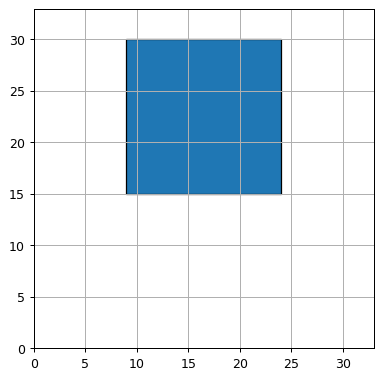

In [25]:
# plotting the scaled rectangle coordinates

fig = plt.figure(1, figsize=(5,5), dpi=90) 
sc_rectangle_shape = Polygon(scaled_points)
ax = fig.add_subplot(111)
sc_rectangle_shape = PolygonPatch(sc_rectangle_shape)
ax.add_patch(sc_rectangle_shape)
ax.set_xlim([0, 33])
ax.set_ylim([0, 33])
ax.set_aspect(1)
plt.grid()
plt.show()

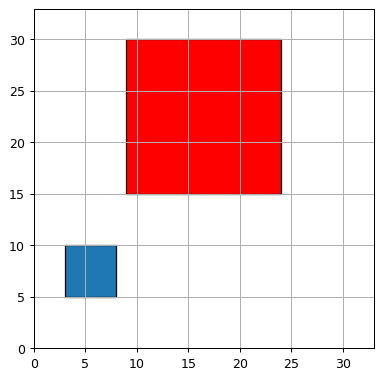

In [26]:
# plotting the original and translated triangle together
fig = plt.figure(1, figsize=(5,5), dpi=90)
sc_rectangle_shape = Polygon(scaled_points)
ax = fig.add_subplot(111)
sc_rectangle_shape = PolygonPatch(sc_rectangle_shape, facecolor='red')
ax.add_patch(sc_rectangle_shape)
rectangle_shape = Polygon(rectangle)
rectangle_shape = PolygonPatch(rectangle_shape)
ax.add_patch(rectangle_shape)
ax.set_xlim([0, 33])
ax.set_ylim([0, 33])
ax.set_aspect(1)
plt.grid()
plt.show()

## **Translation**<a name="translation"></a>

Translation means shifting an object from one position to another using shifting vector/translation vector, $\mathbf{T}$, $\begin{bmatrix}t_x\\t_y\end{bmatrix}$. 

### **Exercise  4** <a name="exercise-4"></a>

### **[Points: 5]**

Here, you create functions in order to perform the translation operation.

#### **Task 1:** <a name="exercise-4-task-1"></a>

#### **[Points: 2]**

In this task, you create a function to calculate the translation homogeneous matrix. 

___Hint:___

   
   * Convert the following 2D translation matrix into homogeneous form:

$$ 
\begin{bmatrix}
t_x  \\ t_y 
\end{bmatrix}
{-------->}^{Homogeneous form}
\begin{bmatrix}
1 & 0 & t_x
 \\
 0 & 1  & t_y
\\  0 & 0 & 1
\end{bmatrix}
$$


In [27]:
### Ex-4-Task-1
def get_translation_matrix(translation_vector):
    
    '''
    This function provides you the translation homogeneous matrix for translation geometric transformation.
    
    Parameters
    ----------
        translation_vector: list, x  and y scaling factors
    
    return
    ------
        translation_matrix : numpy array
    '''
    
    # homogeneous translation matrix 
    translation_matrix = None
    
    # Exercise 4 / Task 1
    ### BEGIN SOLUTION
    # your code here
    translation_matrix = np.identity(3)
    translation_matrix[:2, 2] = translation_vector
    ### END SOLUTION
    
    return translation_matrix

In [28]:
### INTENTIONALLY LEFT BLANK ###

#### **Task 2:** <a name="exercise-4-task-2"></a>

#### **[Points: 3]**

In this task, you create a function to perform the translation and returns the array of translated homogeneous coordinates. 

***Step 1:***  Convert the given coordinates points to homogeneous coordinate system

   * Similar to [Step 1](#exercise-2-task-2) of rotation exercise 2 task 2  
   
***Step 2:*** Calculate the translation matrix
    
   * Use `get_translation_matrix()`, for calculation of the translation matrix

***Step 3:*** Calculate the translated points

   * Use `np.matmul()`, to multiply homogeneous_points and translation_matrix transpose(use np.transpose or .T operator) for calculating the translated points

***Step 4:*** Convert homogeneous rotated points to cartesian form

   * Use `homogeneous_to_cartesian()`

In [29]:
### Ex-4-Task-2
def translation(points, translation_vector):
        '''
            This function performs translation geometric transformation and returns the translated points.
        
            Parameters
            -----------
                translation_vector: list, x  and y scaling factors
        
            return
            ------
                translated_points: numpy array of translated points(homogeneous_form)
                cart_translated_points: numpy array of translated points(cartesian_form)
        '''
        # STEP 1: convert the given points to homogeneous form(in numpy array)
        homogeneous_points = None
        
        # STEP 2: get scaling matrix
        translation_matrix = None
        
        # STEP 3: get translated points by multiplying homogeneous points with translation matrix
        translated_points = None
        
        # STEP 4: convert to cartesian form
        cart_translated_points = None
        
        # Exercise 4 / Task 2
        ### BEGIN SOLUTION
        # your code here
        homogenous_points = cartesian_to_homogeneous(np.asarray(points))
        translation_matrix = get_translation_matrix(translation_vector)
        translated_points = np.matmul(translation_matrix,homogenous_points.T).T
        cart_translated_points = homogeneous_to_cartesian(translated_points)
        ### END SOLUTION
        
        return translated_points, cart_translated_points

In [30]:
### INTENTIONALLY LEFT BLANK ###

Now, let use above codes to scale the same rectangle `ABCD` with coordinates A(3, 5), B(3,10), C(8,10), D(8, 5).

In [31]:
translation_vector = [5,5]

In [32]:
rectangle

[[3, 5], [3, 10], [8, 10], [8, 5]]

In [33]:
# Translation with given translation vector 
homo_translated_points, translated_points = translation(rectangle, translation_vector)
print(homo_translated_points)

translated_points

[[ 8. 10.  1.]
 [ 8. 15.  1.]
 [13. 15.  1.]
 [13. 10.  1.]]


array([[ 8., 10.],
       [ 8., 15.],
       [13., 15.],
       [13., 10.]])

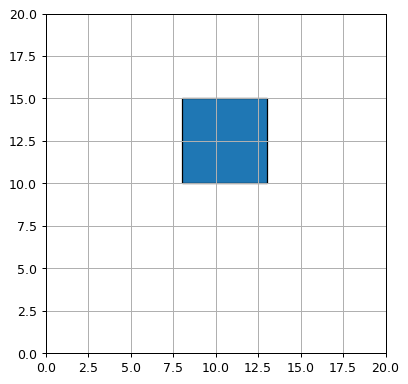

In [35]:
# plotting the translated rectangle coordinates

fig = plt.figure(1, figsize=(5,5), dpi=90) 
trans_rectangle_shape = Polygon(translated_points)
ax = fig.add_subplot(111)
trans_rectangle_shape = PolygonPatch(trans_rectangle_shape)
ax.add_patch(trans_rectangle_shape)
ax.set_xlim([0, 20])
ax.set_ylim([0, 20])
ax.set_aspect(1)
plt.grid()
plt.show()

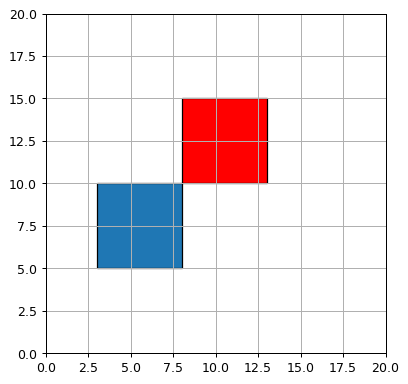

In [36]:
# plotting the original and translated triangle together
fig = plt.figure(1, figsize=(5,5), dpi=90)
trans_rectangle_shape = Polygon(translated_points)
ax = fig.add_subplot(111)
trans_rectangle_shape = PolygonPatch(trans_rectangle_shape, facecolor='red')
ax.add_patch(trans_rectangle_shape)
rectangle_shape = Polygon(rectangle)
rectangle_shape = PolygonPatch(rectangle_shape)
ax.add_patch(rectangle_shape)
ax.set_xlim([0, 20])
ax.set_ylim([0, 20])
ax.set_aspect(1)
plt.grid()
plt.show()

## **Composite Transformation** <a name="composite_transformation"></a>

Composite tramsformation where you perform different types of transformation together. For example, you can perform rotation followed by scaling, which is a simple composite transformation. 

### **Exercise  5** <a name="exercise-5"></a>

### **[Points: 5]**

Here, you will perform the composite tranformation formed by the combination of rotation, scaling and translation. Here, you perform the rotation followed by scaling followed by translation on the same rectangle used in the above codes.

***Step 1:*** Performing rotation

  * Use `rotation()` function for the rotation operation

***Step 2:*** Performing scaling

  * Use `scaling()` function for the scaling operation

***Step 3:*** Performing rotation

  * Use `translation()` function for the translation operation




In [75]:
scaling_factor = [3,4]
translation_vector = [5,5]
COR = [0, 0]
angle = 30

In [76]:
rectangle

[[3, 5], [3, 10], [8, 10], [8, 5]]

In [51]:
### Ex-5-Task-1

# Step 1: rotation operation to get rotated points
rotated_points = None

# Step 2: scaling operation to get scaled points 
scaled_points = None

# Step 3: translation operation to get translated points 
translation_points = None

# Exercise 5
### BEGIN SOLUTION
# your code here
rotated_points = rotation(rectangle, angle, COR)
scaled_points = scaling(rotated_points[1], scaling_factor)
translation_points = translation(scaled_points[1], translation_vector)
translation_points = translation_points[1]
translation_points = [tuple(x) for x in translation_points]

### END SOLUTION



[(0.7573593128807161, 21.97056274847714), (-9.849242404917495, 32.57716446627535), (0.7573593128807179, 43.18376618407356), (11.36396103067893, 32.57716446627535)]


In [52]:
assert rotated_points is not None
assert scaled_points is not None
assert translation_points is not None

### INTENTIONALLY LEFT BLANK ###

/opt/anaconda3/envs/cv/lib/python3.9/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


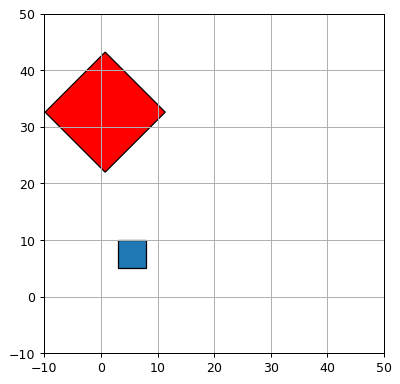

In [53]:
# plotting the original and translated triangle together
fig = plt.figure(1, figsize=(5,5), dpi=90)
trans_rectangle_shape = Polygon(translation_points)
ax = fig.add_subplot(111)
trans_rectangle_shape = PolygonPatch(trans_rectangle_shape, facecolor='red')
ax.add_patch(trans_rectangle_shape)
rectangle_shape = Polygon(rectangle)
rectangle_shape = PolygonPatch(rectangle_shape)
ax.add_patch(rectangle_shape)
ax.set_xlim([-10, 50])
ax.set_ylim([-10, 50])
ax.set_aspect(1)
plt.grid()
plt.show()

In the above figure, you can see the original image(blue color) and composite transformed image(red color).











